<a href="https://colab.research.google.com/github/Charanjeet-x/comp215/blob/main/labs/lab05_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP 215 - LAB 5
----------------
#### Name(s): Charanjeet Singh
#### Date:05/02/2025

By the end of this lab you should be able to:
  * apply both a direct (ie. brute force) and heuristic algorithm to a problem
  * use the networkx module to visualize graphs
  * measure algorithm scaling


During this lab, you will be introduced to the following:
  * seeding the random module



## The Traveling Salesperson Problem

This lab is based on the famous Traveling Salesperson Problem (TSP) outlined in Section 3.3.2 of 'On Complexity'.  Imagine you needed to travel to ten different cities.  What is the sortest possible route you could take to visit every city?  For our version of the problem, you start from a specific city and must end on the same city.

In this lab, you will implement a direct (ie. brute force) and a heuristic solution to the problem.

In [1]:
# start with some imports
import random, math, time, itertools
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

## Set up the map

For this implementation of the problem we will randomly place N cities on a 100 by 100 grid.  Cities will be labelled using a single character; 'A', 'B', 'C', etc.  City locations will be denoted by a 2-tuple, `(x,y)`, giving their position on the grid. In order to create reproducable maps, we will use [random.seed()](https://docs.python.org/3/library/random.html#random.seed) to initialize the random module.  

In [2]:
def setup_map(N, seed=1):
  ''' Returns a map of N cities with random locations on a 100 by 100 grid '''
  random.seed(seed)
  city_locations = [(random.randint(0, 100), random.randint(0, 100)) for i in range(N)]
  city_names = [chr(65 + i) for i in range(N)]
  city_map = dict(zip(city_names, city_locations))
  return city_map

def graph_map(city_map):
  ''' graph the map of cities using networkx'''
  G = nx.Graph()
  G.add_nodes_from(city_map)
  nx.draw(G, city_map, with_labels=True)

def distance(city1, city2, city_map):
  ''' Returns the distance between two cities on a map'''
  x1, y1 = city_map[city1]
  x2, y2 = city_map[city2]
  return round(math.sqrt((x2 - x1)**2 + (y2 - y1)**2),1)

def calculate_distances(city_map):
  ''' Returns a dictionary with the distances between all pairs of cities in a map '''
  distances = {}
  for city1 in city_map:
      for city2 in city_map:
          if city1 != city2:
              # this will have duplicate distances (A,B) and (B,A)
              # these duplicates make the algorithm implememntation simpler
              distances[(city1, city2)] = distance(city1, city2, city_map)
  return distances


City Map: {'A': (17, 72), 'B': (97, 8), 'C': (32, 15), 'D': (63, 97), 'E': (57, 60), 'F': (83, 48), 'G': (100, 26), 'H': (12, 62), 'I': (3, 49), 'J': (55, 77)}
Distances between cities: {('A', 'B'): 102.4, ('A', 'C'): 58.9, ('A', 'D'): 52.4, ('A', 'E'): 41.8, ('A', 'F'): 70.2, ('A', 'G'): 94.9, ('A', 'H'): 11.2, ('A', 'I'): 26.9, ('A', 'J'): 38.3, ('B', 'A'): 102.4, ('B', 'C'): 65.4, ('B', 'D'): 95.3, ('B', 'E'): 65.6, ('B', 'F'): 42.4, ('B', 'G'): 18.2, ('B', 'H'): 100.7, ('B', 'I'): 102.6, ('B', 'J'): 80.8, ('C', 'A'): 58.9, ('C', 'B'): 65.4, ('C', 'D'): 87.7, ('C', 'E'): 51.5, ('C', 'F'): 60.7, ('C', 'G'): 68.9, ('C', 'H'): 51.1, ('C', 'I'): 44.7, ('C', 'J'): 66.1, ('D', 'A'): 52.4, ('D', 'B'): 95.3, ('D', 'C'): 87.7, ('D', 'E'): 37.5, ('D', 'F'): 52.9, ('D', 'G'): 80.1, ('D', 'H'): 61.9, ('D', 'I'): 76.8, ('D', 'J'): 21.5, ('E', 'A'): 41.8, ('E', 'B'): 65.6, ('E', 'C'): 51.5, ('E', 'D'): 37.5, ('E', 'F'): 28.6, ('E', 'G'): 54.8, ('E', 'H'): 45.0, ('E', 'I'): 55.1, ('E', 'J'): 17.1,

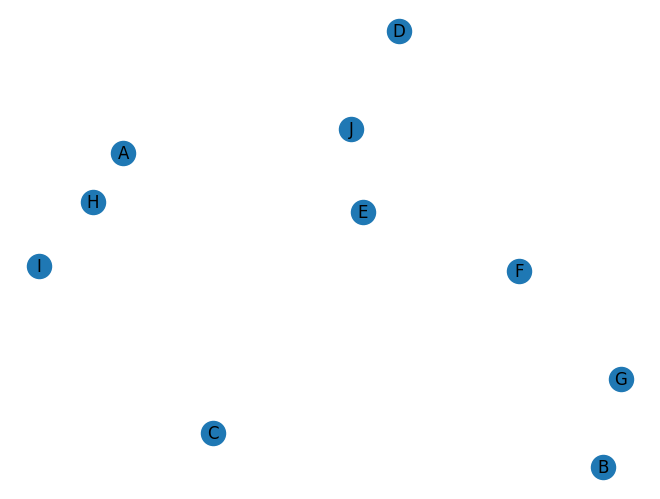

In [3]:
# test our setup functions
city_map = setup_map(10)
print(f'City Map: {city_map}')
distances = calculate_distances(city_map)
print(f'Distances between cities: {distances}')
graph_map(city_map)

### Exercise 1: The Brute Force Solution

Implement a brute force solution to the traveling salesman problem using the city map and distance dictionary given above.  The algorithm for the brute force solution looks something like this:
 1. Loop over every possible route that starts and ends on city A.  For a three city example, this would be ABCA, ACBA.  
 2. Calculate the total distance of each possible route.  
 3. Find the route with the minimum total distance.

Before you start coding, think about what functions and/or class you might want to simplify your implementation of the algorithm.  Write a small test for your algorithm.

In [4]:
def force(city_map):
    distances = calculate_distances(city_map)
    cities = []
    for city in city_map.keys():
      if city != 'A':
        cities.append(city)

    min_distance = float('inf')

    for route_rest in itertools.permutations(cities):
      route = ('A',) + route_rest + ('A',)

      total_distance = 0
      for i in range(len(route) - 1):
        total_distance += distances[(route[i], route[i + 1])]

      if total_distance < min_distance:
        min_distance = total_distance
        min_route = route
    return min_route, min_distance

min_route, min_distance = force(city_map)
f'The brute force route will be {min_route} and the total distance will be {min_distance}'


"The brute force route will be ('A', 'D', 'J', 'E', 'F', 'G', 'B', 'C', 'I', 'H', 'A') and the total distance will be 302.7"

### Exercise 2: Nearest Neighbour

Implement a nearest neighbour solution to the traveling salesman problem using the city map and distance dictionary given above.  The algorithm for the nearest neighbour solution looks something like this:
 1. Start from the starting city.  
 2. Go to the nearest city that has not been visited.  
 3. Repeat steps 1 and 2 until all cities have been visited.

Before you start coding, think about what functions and/or class you might want to simplify your implementation of the algorithm.  Write a small test for your algorithm.

In [5]:
# Ex.2 your code here
def nearest_neighbour(city_map):
  distances = calculate_distances(city_map)
  my_city = 'A'
  yet_to_visit = list(city_map.keys())
  yet_to_visit.remove(my_city)
  total_distance = 0
  route = [my_city]

  while yet_to_visit:
    nearest_city = min(yet_to_visit, key=lambda x: distances[(my_city, x)])
    total_distance += distances[(my_city, nearest_city)]
    route.append(nearest_city)
    my_city = nearest_city
    yet_to_visit.remove(my_city)

  route.append(route[0])
  total_distance += distances[(route[-2], route[-1])]

  return route, total_distance


f"The nearest neighbour route will be {nearest_neighbour(city_map)[0]} and the total distance will be {nearest_neighbour(city_map)[1]}"


"The nearest neighbour route will be ['A', 'H', 'I', 'C', 'E', 'J', 'D', 'F', 'G', 'B', 'A'] and the total distance will be 363.1"

### Exercise 3: Graph the Routes

Use the networkx module to create directed graphs of the routes (brute force and nearest neighbour).  Include the distances between the cities on the edges.  Run several different map setups with a different sizes (ie. number of cities).  Do the brute force (ie. direct) and nearest neighbour (ie. heuristic) algorithms always give the same solution?  Do you notice anything about the brute force solutions that suggests an alternative heuristic algorithm?


Enter the number of cities: 8


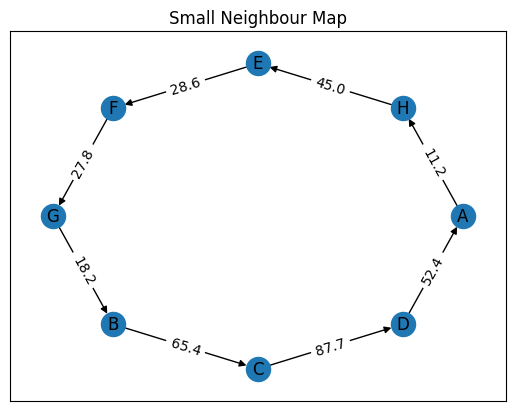

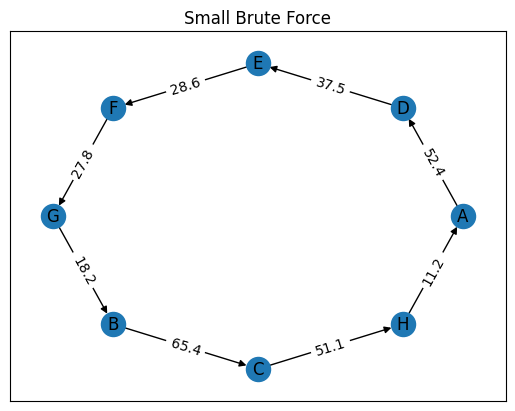

Both graphs gives different outputs depending upon the number cities you plot on map


In [6]:
import networkx as nx
import matplotlib.pyplot as plt

def graph_route(route, min_route):
  G = nx.DiGraph()
  plt.title('Brute Force')
  G.add_nodes_from(route)
  for i in range(10):
    G.add_edge(route[i], route[i + 1], weight=distance(route[i], route[i + 1], city_map))

  pos = nx.circular_layout(G)
  nx.draw_networkx_nodes(G, pos)
  nx.draw_networkx_edges(G, pos)
  nx.draw_networkx_labels(G, pos)
  edge_labels = nx.get_edge_attributes(G,'weight')
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
  plt.show()
#graph_route(force(city_map)[0], nearest_neighbour(city_map)[0])

def graph(route):
  G = nx.DiGraph()
  plt.title('Nearest Neighbour')
  G.add_nodes_from(route)
  for i in range(10):
    G.add_edge(route[i], route[i + 1], weight=distance(route[i], route[i + 1], city_map))

  pos = nx.circular_layout(G)
  nx.draw_networkx_nodes(G, pos)
  nx.draw_networkx_edges(G, pos)
  nx.draw_networkx_labels(G, pos)
  edge_labels = nx.get_edge_attributes(G,'weight')
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
  plt.show()
#graph(nearest_neighbour(city_map)[0])

number = int(input("Enter the number of cities: "))

def small_map(route):
  G = nx.DiGraph()
  plt.title('Small Neighbour Map')
  G.add_nodes_from(route)
  for i in range(number):
    G.add_edge(route[i], route[i + 1], weight=distance(route[i], route[i + 1], city_map))

  pos = nx.circular_layout(G)
  nx.draw_networkx_nodes(G, pos)
  nx.draw_networkx_edges(G, pos)
  nx.draw_networkx_labels(G, pos)
  edge_labels = nx.get_edge_attributes(G,'weight')
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
  plt.show()
small_map(nearest_neighbour(setup_map(number))[0])

def small_nearest_neighbour(min_route):
  G = nx.DiGraph()
  plt.title('Small Brute Force')
  G.add_nodes_from(min_route)
  for i in range(number):
    G.add_edge(min_route[i], min_route[i + 1], weight=distance(min_route[i], min_route[i + 1], city_map))

  pos = nx.circular_layout(G)
  nx.draw_networkx_nodes(G, pos)
  nx.draw_networkx_edges(G, pos)
  nx.draw_networkx_labels(G, pos)
  edge_labels = nx.get_edge_attributes(G,'weight')
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
  plt.show()
small_nearest_neighbour(force(setup_map(number))[0])



print('Both graphs gives different outputs depending upon the number cities you plot on map')




### Exercise 4: Algorithm Scaling

Use the `time` module to measure the running time of the two algorithms.  Note that the `time.time()` function returns the current time, so calling it before and after the algorithm has run can give you the time it takes for the algorithm to execute.  Taking the average over several trials will make the measurement more precise.  Demonstrate the scaling nature of the algorithms by plotting their execution time as a function of N, up to about N = 10.  

In [8]:
# Ex 4: your code here
import time
time1 = time.time()

for i in range(10):
  nearest_neighbour(setup_map(10))
  time2 = time.time()
print((time2 - time1)/10)

for i in range(10):
  force(setup_map(10))
  time3 = time.time()
print((time3 - time1)/10)

f"Every single time the brute algorithm takes much longer than heuristic algorithm"





0.00014388561248779297
1.2722267389297486


'Every single time the brute algorithm takes much longer than heuristic algorithm'